In [207]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12,16)

df = pd.read_csv("bike_sales_data_world_2013_2023.csv")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
0,2017-11-26,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,...,4,13.25,2,25,True,40.58,GLS,Standard,Basic,30 Days
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
2,2019-03-23,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,3,8.97,1,0,True,74.54,GLS,Express,Premium,7 Days
3,2015-03-23,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,5,2.56,1,10,False,61.87,DHL,Same Day,NaN,7 Days
4,2018-05-15,15,May,2018,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,5,11.21,1,6,False,19.82,GLS,Same Day,Basic,30 Days


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit            226072 non-null  int64  
 16  Cost              22

In [211]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Rating,Shipping_Weight,Delivery_Time,Discount,Shipping_Cost
count,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000
mean,15.665753,2017.992887,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,3.005724,7.748286,5.001009,14.488172,52.471199
std,8.781547,3.163415,11.021911,9.561836,549.834267,922.069180,453.886439,884.864161,1309.091778,1.416783,4.185197,2.579064,8.631218,27.398519
min,1.000000,2013.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,1.000000,0.500000,1.000000,0.000000,5.000000
25%,8.000000,2015.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,2.000000,4.120000,3.000000,7.000000,28.700000
50%,16.000000,2018.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,3.000000,7.750000,5.000000,15.000000,52.580000
75%,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,4.000000,11.360000,7.000000,22.000000,76.230000
max,31.000000,2023.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,5.000000,15.000000,9.000000,29.000000,100.000000


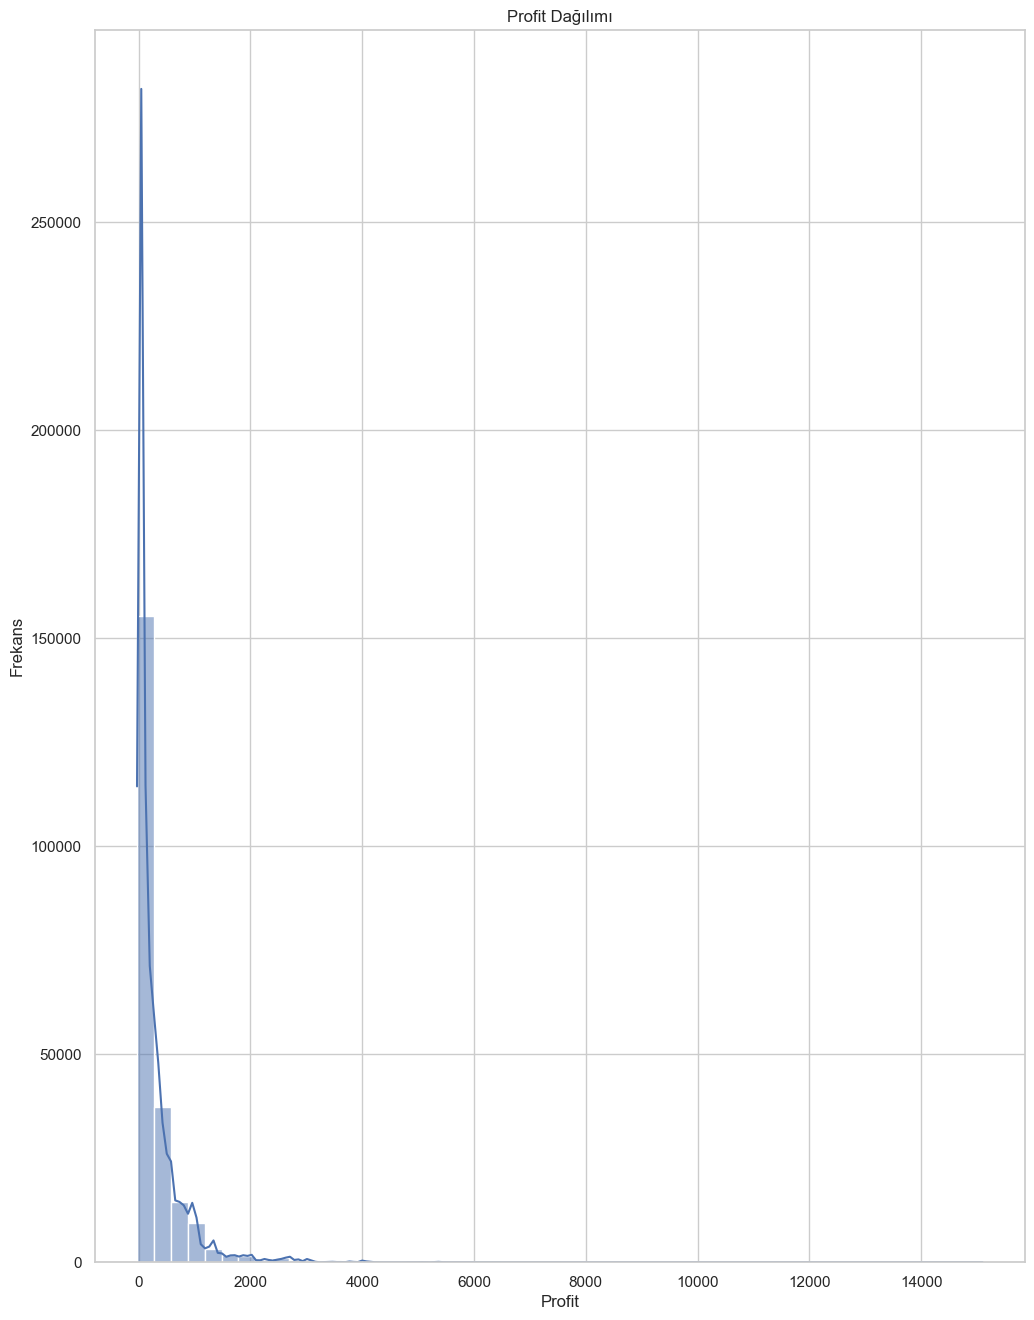

In [213]:
sns.histplot(df["Profit"], kde=True, bins=50)
plt.title("Profit Dağılımı")
plt.xlabel("Profit")
plt.ylabel("Frekans")
plt.show()

# histogram neden kullandık?
# bir değişkenin hangi değer aralığında kaç kere geçtiğini görmek için 
# belirli kar aralıklarında kaç tane satış kaydı oldu.
# frekans ile kaç adet satış olduğunu 
# çoğu satışın 0 ile 2000 arasında olduğunu gözlemleyebiliriz

1) Bu grafiğe bakarak normal dağılmış mı?
- Veri çarpık dağılım göstermektedir.
2) Aykırı değerler var mı?
- Aykırı değerler bulunmaktadır. 
3) Karın büyük bir kısmı düşük seviyelerde mi toplanmış?
- Evet, karın büyük kısmı 0-300 aralğında toplanmıştır. 

### Çözümler ve Çıkarımlar
1) Çarpıklık varsa normal dağılımda kullanılan modelleri eğitimde kullanamayız.
2) Bazı dönüşümler kullanabiliriz. log(Profit + 1) gibi
3) Aykırı değerler modelin öğrenme sürecini bozabildiğinden filtreleme, dönüştürme ve aykırı değerleri ayrı analiz etme gibi işlemler
yapabiliriz.
4) Model küçük karları daha doğru tahmin edecek çünkü veririnin büyük kısmı o bölümde. 

### Hedef Değişken ile Diğer Değişkenlerin İlşkisini Anlamak

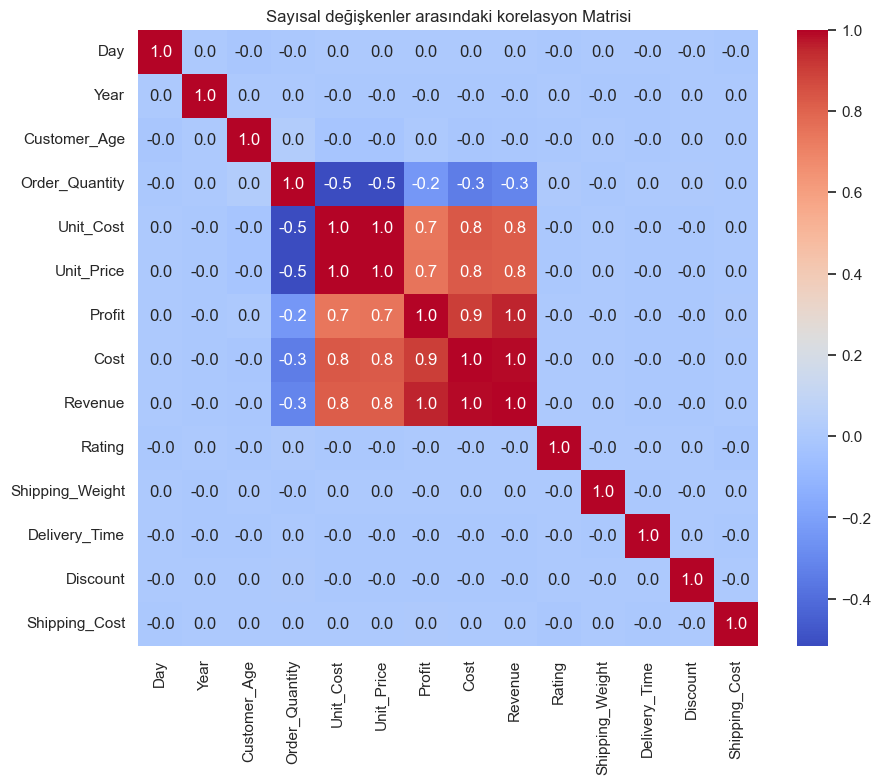

In [218]:
# Sayısal sütünlar arasındaki korelasyonu inceleme:

# sadece sayısal sütunları seçmek
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

# Korelasyon matrisini oluşturmak
corr_matrix = df[numeric_cols].corr()

# sadece profit ile olan korelasyonu incelemek
corr_with_profit = corr_matrix["Profit"].sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm", fmt=".1f")
plt.title("Sayısal değişkenler arasındaki korelasyon Matrisi")
plt.show()

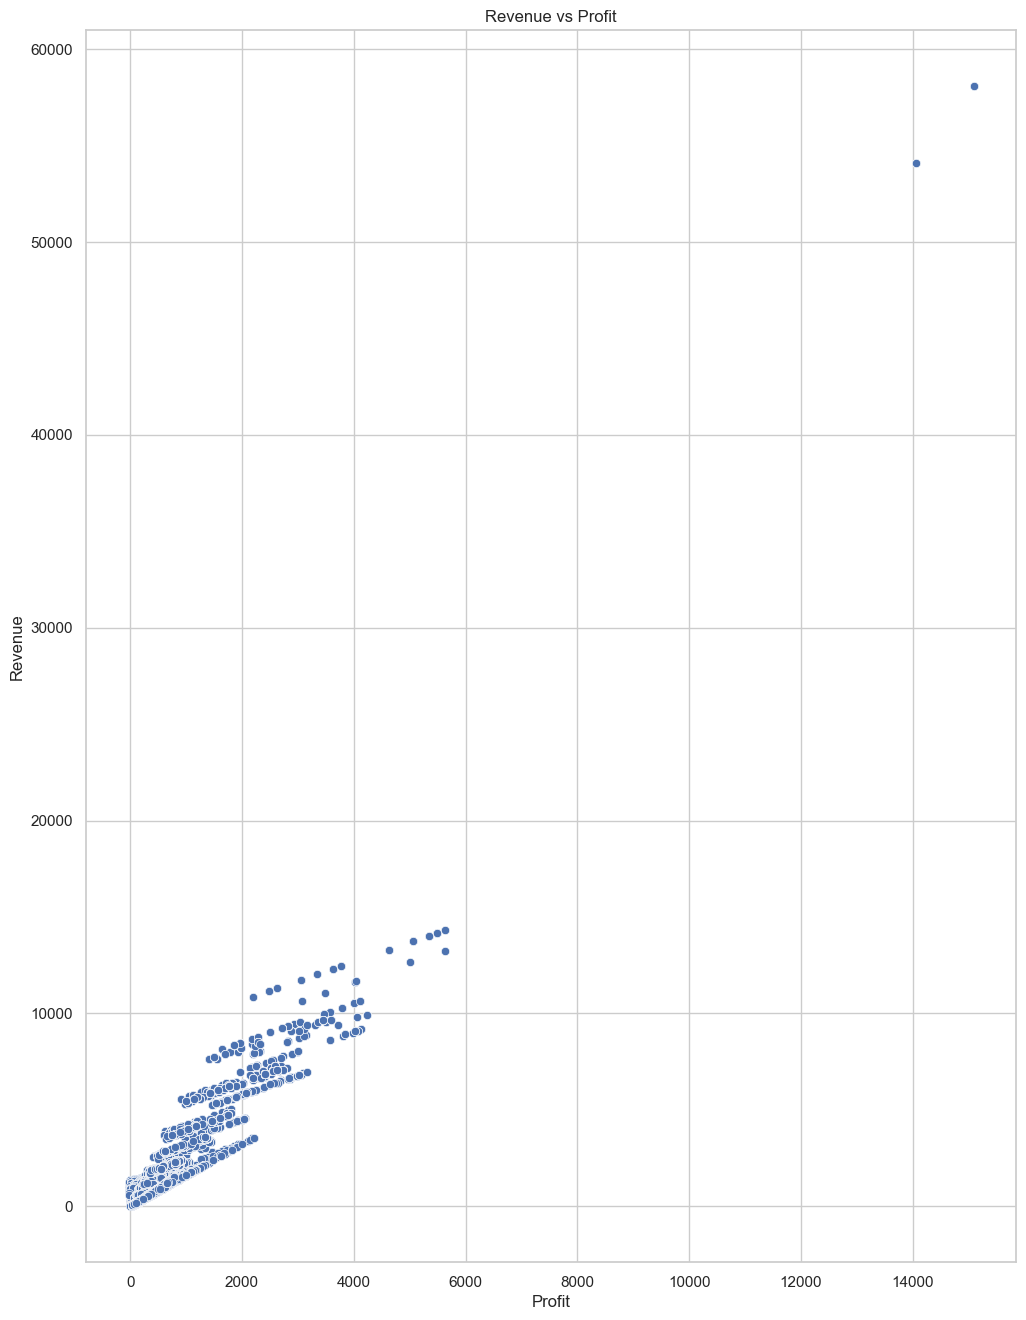

In [219]:
# Revenue ile profit arasındaki ilişki 
sns.scatterplot(data=df, x="Profit", y="Revenue")
plt.title("Revenue vs Profit")
plt.show()

## Veri Ön İşleme (Preprocessing)

### Eksik Değer Kontrolü

In [222]:
missing_values = df.isnull().sum()
missing_values

Date                    0
Day                     0
Month                   0
Year                    0
Customer_Age            0
Age_Group               0
Customer_Gender         0
Country                 0
State                   0
Product_Category        0
Sub_Category            0
Product                 0
Order_Quantity          0
Unit_Cost               0
Unit_Price              0
Profit                  0
Cost                    0
Revenue                 0
Size                    0
Color                   0
Material                0
Warranty                0
Manufacturer            0
Rating                  0
Shipping_Weight         0
Delivery_Time           0
Discount                0
Eco_Friendly            0
Shipping_Cost           0
Shipping_Company        0
Shipping_Type           0
Insurance           75282
Return_Policy           0
dtype: int64

In [224]:
missing_values[missing_values > 0].sort_values(ascending=False)

Insurance    75282
dtype: int64

In [227]:
missing_ratio = (df.isnull().sum() / len(df)) * 100
missing_ratio

Date                 0.000000
Day                  0.000000
Month                0.000000
Year                 0.000000
Customer_Age         0.000000
Age_Group            0.000000
Customer_Gender      0.000000
Country              0.000000
State                0.000000
Product_Category     0.000000
Sub_Category         0.000000
Product              0.000000
Order_Quantity       0.000000
Unit_Cost            0.000000
Unit_Price           0.000000
Profit               0.000000
Cost                 0.000000
Revenue              0.000000
Size                 0.000000
Color                0.000000
Material             0.000000
Warranty             0.000000
Manufacturer         0.000000
Rating               0.000000
Shipping_Weight      0.000000
Delivery_Time        0.000000
Discount             0.000000
Eco_Friendly         0.000000
Shipping_Cost        0.000000
Shipping_Company     0.000000
Shipping_Type        0.000000
Insurance           33.300011
Return_Policy        0.000000
dtype: flo

In [229]:
missing_ratio[missing_ratio >0].sort_values(ascending=False)

Insurance    33.300011
dtype: float64

In [231]:
df[df.isnull().any(axis=1)].head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
3,2015-03-23,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,5,2.56,1,10,False,61.87,DHL,Same Day,NaN,7 Days
9,2023-02-22,22,February,2023,35,Adults (35-64),M,Australia,Victoria,Accessories,...,5,12.28,6,9,False,72.27,UPS,Standard,NaN,No Return
10,2015-07-30,30,July,2015,32,Young Adults (25-34),F,Australia,Victoria,Accessories,...,4,8.19,4,19,False,6.96,GLS,Standard,NaN,No Return
11,2019-07-30,30,July,2019,32,Young Adults (25-34),F,Australia,Victoria,Accessories,...,3,3.76,9,17,True,97.14,GLS,Standard,NaN,7 Days


Sadece insurance(sigorta) sütununda eksik veri bulunmaktadır. bu sütundaki eksiklik oranı %33 civarındadır. 
Diğer sütunlarda eksik veri bulunmamaktadır. 

Bu satırı silebiliriz fakat bu işlemi yapmadan önce bazı adımları gözlemlemeiz gerek.
1) Insurance sütunu Protif üzerinde etkili mi? Eğer bu sütunun Profit ile güçlü bir ilişkisi varsa, silmeden önce doldurmak düşünülebilir.


In [235]:
# küçük bir kontrol yapalım 
# grupby ile aynı kategoriye sahip değerleri profit sütunundaki değerlerin ortalamasını alamayı sağladık. 
# Insurance içinde basic, premium ve none değerler bulunmakta. 
# Ortalama değerler birbirine yakın olduğu için iki kategori arasında bir fark gözükmemektedir. 
# Sigorta yaptırmanın kar üzeride herhangi bir etkisi bulunmamaktadır.
# bu yüzden bu satırı kaldırmak en mantıklı işlem olabilir.

df.groupby("Insurance")["Profit"].mean()

Insurance
Basic      285.402074
Premium    286.965965
Name: Profit, dtype: float64

In [237]:
print("Insurance" in df.columns)

True


In [239]:
df.drop(columns=["Insurance"], inplace= True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit            226072 non-null  int64  
 16  Cost              22

## Kategorik Değişkenleri Sayısala Çevirme

İki şekilde bu işlem gerçekleştirilir. OneHotEncoder ve OrdinalEncoder. 
OneHotEncoder kullanılırsa her bir kategori sütun olur ve 0 ile 1 değeri alır. 
OrdinalEncoder kullanılırsa sırayla değerler atanır. 

In [245]:
categorical_cols = df.select_dtypes(include=["object", "bool"])
categorical_cols

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Size,Color,Material,Warranty,Manufacturer,Eco_Friendly,Shipping_Company,Shipping_Type,Return_Policy
0,2017-11-26,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,Extra Large,White,Plastic,1 Year,Manufacturer A,True,GLS,Standard,30 Days
1,2014-11-26,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,Extra Large,White,Steel,2 Years,Manufacturer A,True,Posti,Same Day,30 Days
2,2019-03-23,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,Small,Green,Steel,1 Year,Manufacturer D,True,GLS,Express,7 Days
3,2015-03-23,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,Small,Red,Carbon Fiber,1 Year,Manufacturer A,False,DHL,Same Day,7 Days
4,2018-05-15,May,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,Extra Large,Blue,Steel,3 Years,Manufacturer A,False,GLS,Same Day,30 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226067,2014-04-12,April,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",Extra Large,Green,Aluminum,Lifetime,Manufacturer B,False,UPS,Standard,30 Days
226068,2015-04-02,April,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",Extra Large,White,Aluminum,1 Year,Manufacturer A,False,Posti,Express,30 Days
226069,2021-04-02,April,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",Medium,Green,Aluminum,2 Years,Manufacturer B,False,FedEx,Standard,30 Days
226070,2016-03-04,March,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",Medium,Red,Carbon Fiber,3 Years,Manufacturer A,True,DHL,Next Day,7 Days


In [247]:
categorical_cols.columns.tolist()

['Date',
 'Month',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Size',
 'Color',
 'Material',
 'Warranty',
 'Manufacturer',
 'Eco_Friendly',
 'Shipping_Company',
 'Shipping_Type',
 'Return_Policy']

## ColumnTransformer ve Pipeline Kullanımı

In [250]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [252]:
onehot_cols = [
    "Customer_Gender", "Product_Category", "Sub_Category",
    "Color", "Material", "Manufacturer", "Eco_Friendly", "Shipping_Company"
]

# Ordinal uygulanacak sütunlar (şimdilik sıralama tanımı yapılmadan)
ordinal_cols = ["Month", "Age_Group", "Size", "Warranty", "Shipping_Type", "Return_Policy"]

# Sayısal sütunlar
numeric_cols = [
    "Day", "Year", "Customer_Age", "Order_Quantity", "Unit_Cost", "Unit_Price",
    "Cost", "Revenue", "Rating", "Shipping_Weight", "Delivery_Time", "Discount", "Shipping_Cost"
]

In [254]:
onehot_transformer = OneHotEncoder(handle_unknown="ignore")
ordinal_transformer = OrdinalEncoder()
numeric_transformer = StandardScaler()

In [256]:
preprocessing = ColumnTransformer(transformers=[("onehot",onehot_transformer, onehot_cols),
                                              ("ordinal", ordinal_transformer, ordinal_cols),
                                              ("numeric", numeric_transformer, numeric_cols)])

In [258]:
pipeline = Pipeline(steps=[("preprocessing", preprocessing), ("regressor",LinearRegression())])

## Eğitim Verisinin Hazırlanması ve Eğitim Yapılması Adımları:

In [261]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Profit"])
y = df["Profit"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [263]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer_Gender',
                                                   'Product_Category',
                                                   'Sub_Category', 'Color',
                                                   'Material', 'Manufacturer',
                                                   'Eco_Friendly',
                                                   'Shipping_Company']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Month', 'Age_Group', 'Size',
                                                   'Warranty', 'Shipping_Type',
                                                   'Return_Policy']),
                                                 ('numeric', StandardScaler(),
                                                  ['Day', 'Year',
                                                   'Customer_Age',
                                                   'Order_Quantity',
                                                   'Unit_Cost', 'Unit_Price',
                                                   'Cost', 'Revenue', 'Rating',
                                                   'Shipping_Weight',
                                                   'Delivery_Time', 'Discount',
                                                   'Shipping_Cost'])])),
                ('regressor', LinearRegression())])

In [264]:
y_pred = pipeline.predict(x_test)

In [265]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 0.00
RMSE: 0.00
R^2 Score: 1.00


### Metriklerin Açıklanması:
- Model hiç hata yapmamış
- Tahminler gerçek değerlerle birebir aynı
- r2 skoru maksimum başarıyı göstermiş durumda
- Gerçek hayatta bu neredeyse imkansızdır
- Büyük olasılıkla yüksek kolerasyon hatırlaması ile bu sonuçları aldık
- Profit değeri, Revenue, Cost, Unit_Price, Unit_Cost gibi değişkenlerle doğrudan hesaplanabiliyor.
- Bu sütunları kaldırmak faydalı olacaktır

### Düzenleme ve İşlemlerin Tekrar Edilmesi

In [270]:
onehot_cols = [
    "Customer_Gender", "Product_Category", "Sub_Category",
    "Color", "Material", "Manufacturer", "Eco_Friendly", "Shipping_Company"
]

# Ordinal uygulanacak sütunlar (şimdilik sıralama tanımı yapılmadan)
ordinal_cols = ["Month", "Age_Group", "Size", "Warranty", "Shipping_Type", "Return_Policy"]

# Sayısal sütunlar
numeric_cols = [
    "Day", "Year", "Customer_Age", "Order_Quantity", "Rating", "Shipping_Weight", "Delivery_Time", "Discount", "Shipping_Cost"
]

In [272]:
onehot_transformer = OneHotEncoder(handle_unknown="ignore")
ordinal_transformer = OrdinalEncoder()
numeric_transformer = StandardScaler()

In [275]:
preprocessing = ColumnTransformer(transformers=[("onehot",onehot_transformer, onehot_cols),
                                              ("ordinal", ordinal_transformer, ordinal_cols),
                                              ("numeric", numeric_transformer, numeric_cols)])

In [277]:
pipeline = Pipeline(steps=[("preprocessing", preprocessing), ("regressor",LinearRegression())])

In [279]:
drop_cols = ["Revenue", "Cost", "Unit_Price", "Unit_Cost"]

x= df.drop(columns=["Profit"] + drop_cols)
y= df["Profit"]

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [283]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer_Gender',
                                                   'Product_Category',
                                                   'Sub_Category', 'Color',
                                                   'Material', 'Manufacturer',
                                                   'Eco_Friendly',
                                                   'Shipping_Company']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Month', 'Age_Group', 'Size',
                                                   'Warranty', 'Shipping_Type',
                                                   'Return_Policy']),
                                                 ('numeric', StandardScaler(),
                                                  ['Day', 'Year',
                                                   'Customer_Age',
                                                   'Order_Quantity', 'Rating',
                                                   'Shipping_Weight',
                                                   'Delivery_Time', 'Discount',
                                                   'Shipping_Cost'])])),
                ('regressor', LinearRegression())])

In [284]:
y_pred = pipeline.predict(x_test)

In [285]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 166.80
RMSE: 331.46
R^2 Score: 0.47


### Yeni Metriklerin Değerlendirilmesi:
- Model orta düzeyde bir performansa sahip
- İyileştirilme potansiyeli yüksek
- Korelasyona katkısı yüksek olan sütunların çıkartılması elbette bir doğruluk kaybına sebep oldu.
- Bazı kategorik sütunlar model için çok anlamlı olmayabilir.
- Linear model karmaşık ilişkileri öğrenmemiş olabilir. 

## RandomForestRegressor ile Tekrar İşlemlerin Yapılması

In [329]:
from sklearn.ensemble import RandomForestRegressor

In [331]:
pipeline_rf = Pipeline(steps=[("preprocessing",preprocessing),
                              ("regressor",RandomForestRegressor(n_estimators=100,random_state=42))])

In [333]:
drop_cols = ["Revenue", "Cost", "Unit_Price", "Unit_Cost"]

x= df.drop(columns=["Profit"] + drop_cols)
y= df["Profit"]

In [335]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [337]:
pipeline_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer_Gender',
                                                   'Product_Category',
                                                   'Sub_Category', 'Color',
                                                   'Material', 'Manufacturer',
                                                   'Eco_Friendly',
                                                   'Shipping_Company']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Month', 'Age_Group', 'Size',
                                                   'Warranty', 'Shipping_Type',
                                                   'Return_Policy']),
                                                 ('numeric', StandardScaler(),
                                                  ['Day', 'Year',
                                                   'Customer_Age',
                                                   'Order_Quantity', 'Rating',
                                                   'Shipping_Weight',
                                                   'Delivery_Time', 'Discount',
                                                   'Shipping_Cost'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [338]:
y_pred = pipeline_rf.predict(x_test)

In [339]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 61.54
RMSE: 149.11
R^2 Score: 0.89


### Metriklerin Değerlendirilmesi
- Model değişikliği skoru arttırdı.
- RandomForestClassifier doğrusal olmayan ilişkilerde iyi çalışmaktadır.
- Kategorik verileri daha iyi işler.
- Aykırı ve dengesiz verilerden fazla etkilenmez.

## GridSearchCV ile Değerlerin Arttırılması

In [358]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# regressor__ kısmı önemli çünkü pipeline içindeki modele ulaşmak için 'pipeline_adımı__parametre' şeklinde a
param_grid = {
    'regressor__n_estimators':[50,100],
    'regressor__max_depth':[10,20,None],
    'regressor__min_samples_split':[2,5],
    'regressor__min_samples_leaf':[1,2]
}

In [360]:
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='r2', n_jobs = -1, verbose=2)

In [362]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=  50.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=  51.0s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=  51.1s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=50; total time=  50.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=50; total time=  50.9s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time= 1.7min
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time= 1.6min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time= 1.6min
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time= 2.4min
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time= 2.4min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=50; total time= 1.4min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=50; total time= 1.4min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=50;

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Customer_Gender',
                                                                          'Product_Category',
                                                                          'Sub_Category',
                                                                          'Color',
                                                                          'Material',
                                                                          'Manufacturer',
                                                                          'Eco_Friendly',
                                                                          'Shipping_Company']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Month',
                                                                          'Age_Group',
                                                                          'Size',
                                                                          'Warranty',
                                                                          'Shipping_Type',
                                                                          'R...
                                                                          'Customer_Age',
                                                                          'Order_Quantity',
                                                                          'Rating',
                                                                          'Shipping_Weight',
                                                                          'Delivery_Time',
                                                                          'Discount',
                                                                          'Shipping_Cost'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__min_samples_leaf': [1, 2],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [50, 100]},
             scoring='r2', verbose=2)

In [364]:
print("en iyi parametreler: ", grid_search.best_params_)
print("En iyi r2 sonucu: ", grid_search.best_score_)

en iyi parametreler:  {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
En iyi r2 sonucu:  0.8083118300799099


In [366]:
y_pred_grid = grid_search.predict(x_test)

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_grid)
rmse = root_mean_squared_error(y_test, y_pred_grid)
r2 = r2_score(y_test, y_pred_grid)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 61.54
RMSE: 149.11
R² Score: 0.89


In [370]:
model = grid_search.best_estimator_.named_steps["regressor"]
importances = model.feature_importances_

In [380]:
feature_names = preprocessing.get_feature_names_out()

In [382]:
import pandas as pd 
feat_imp = pd.DataFrame({"Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp.head(10))  # En önemli 10 özellik

                           Feature  Importance
3   onehot__Product_Category_Bikes    0.367762
51         numeric__Order_Quantity    0.210647
53        numeric__Shipping_Weight    0.039270
50           numeric__Customer_Age    0.037770
56          numeric__Shipping_Cost    0.034447
48                    numeric__Day    0.028785
55               numeric__Discount    0.026004
42                  ordinal__Month    0.020373
49                   numeric__Year    0.018623
54          numeric__Delivery_Time    0.017486


In [386]:
import joblib

joblib.dump(grid_search.best_estimator_, 'profit_prediction_model.joblib')

['profit_prediction_model.joblib']

In [390]:
loaded_model = joblib.load("profit_prediction_model.joblib")
y_pred_loaded = loaded_model.predict(x_test)

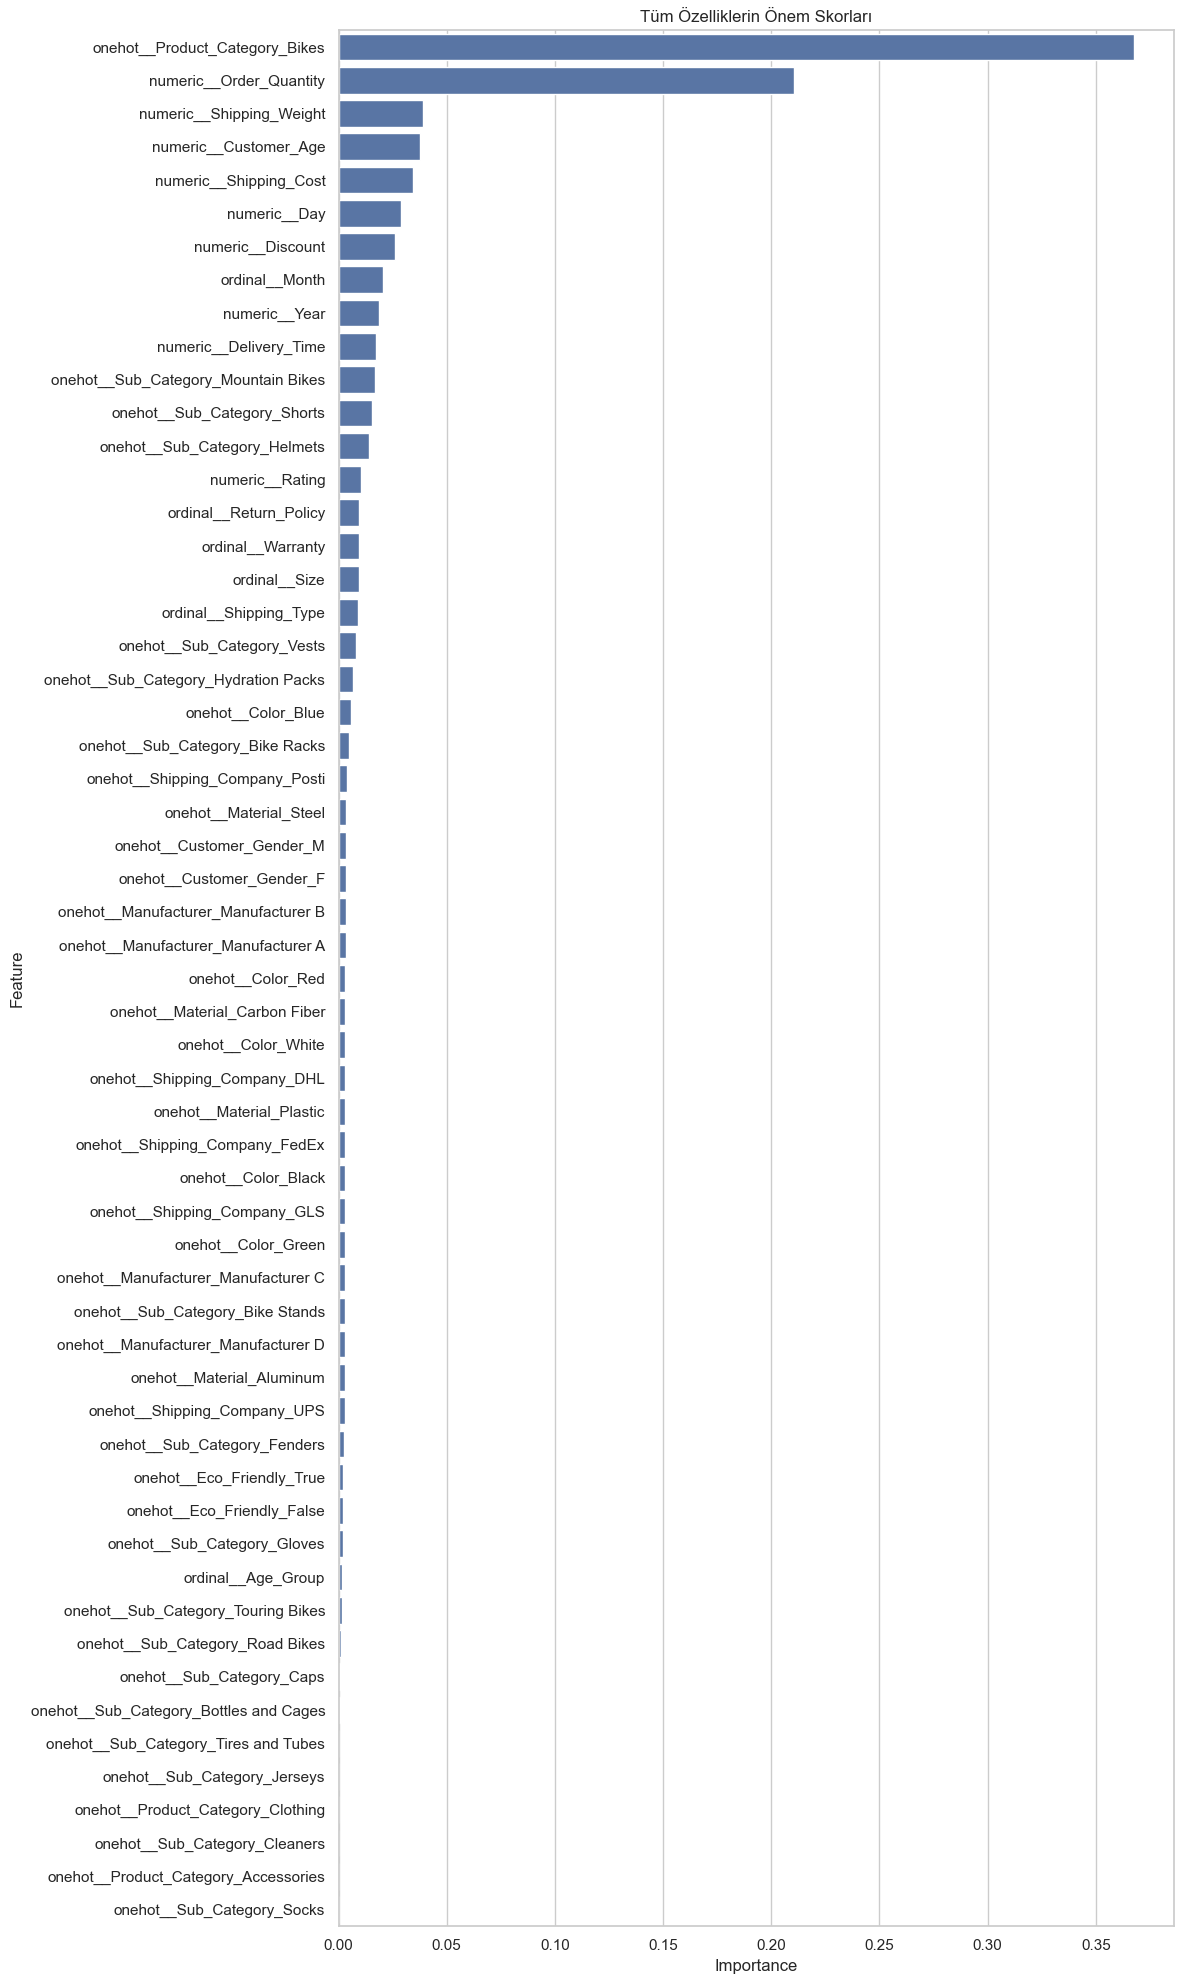

In [394]:
plt.figure(figsize=(12, 20))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Tüm Özelliklerin Önem Skorları")
plt.tight_layout()
plt.show()